# **Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# **Data Exploration**

In [2]:
data = pd.read_csv("/content/drive/MyDrive/day.csv")

In [3]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


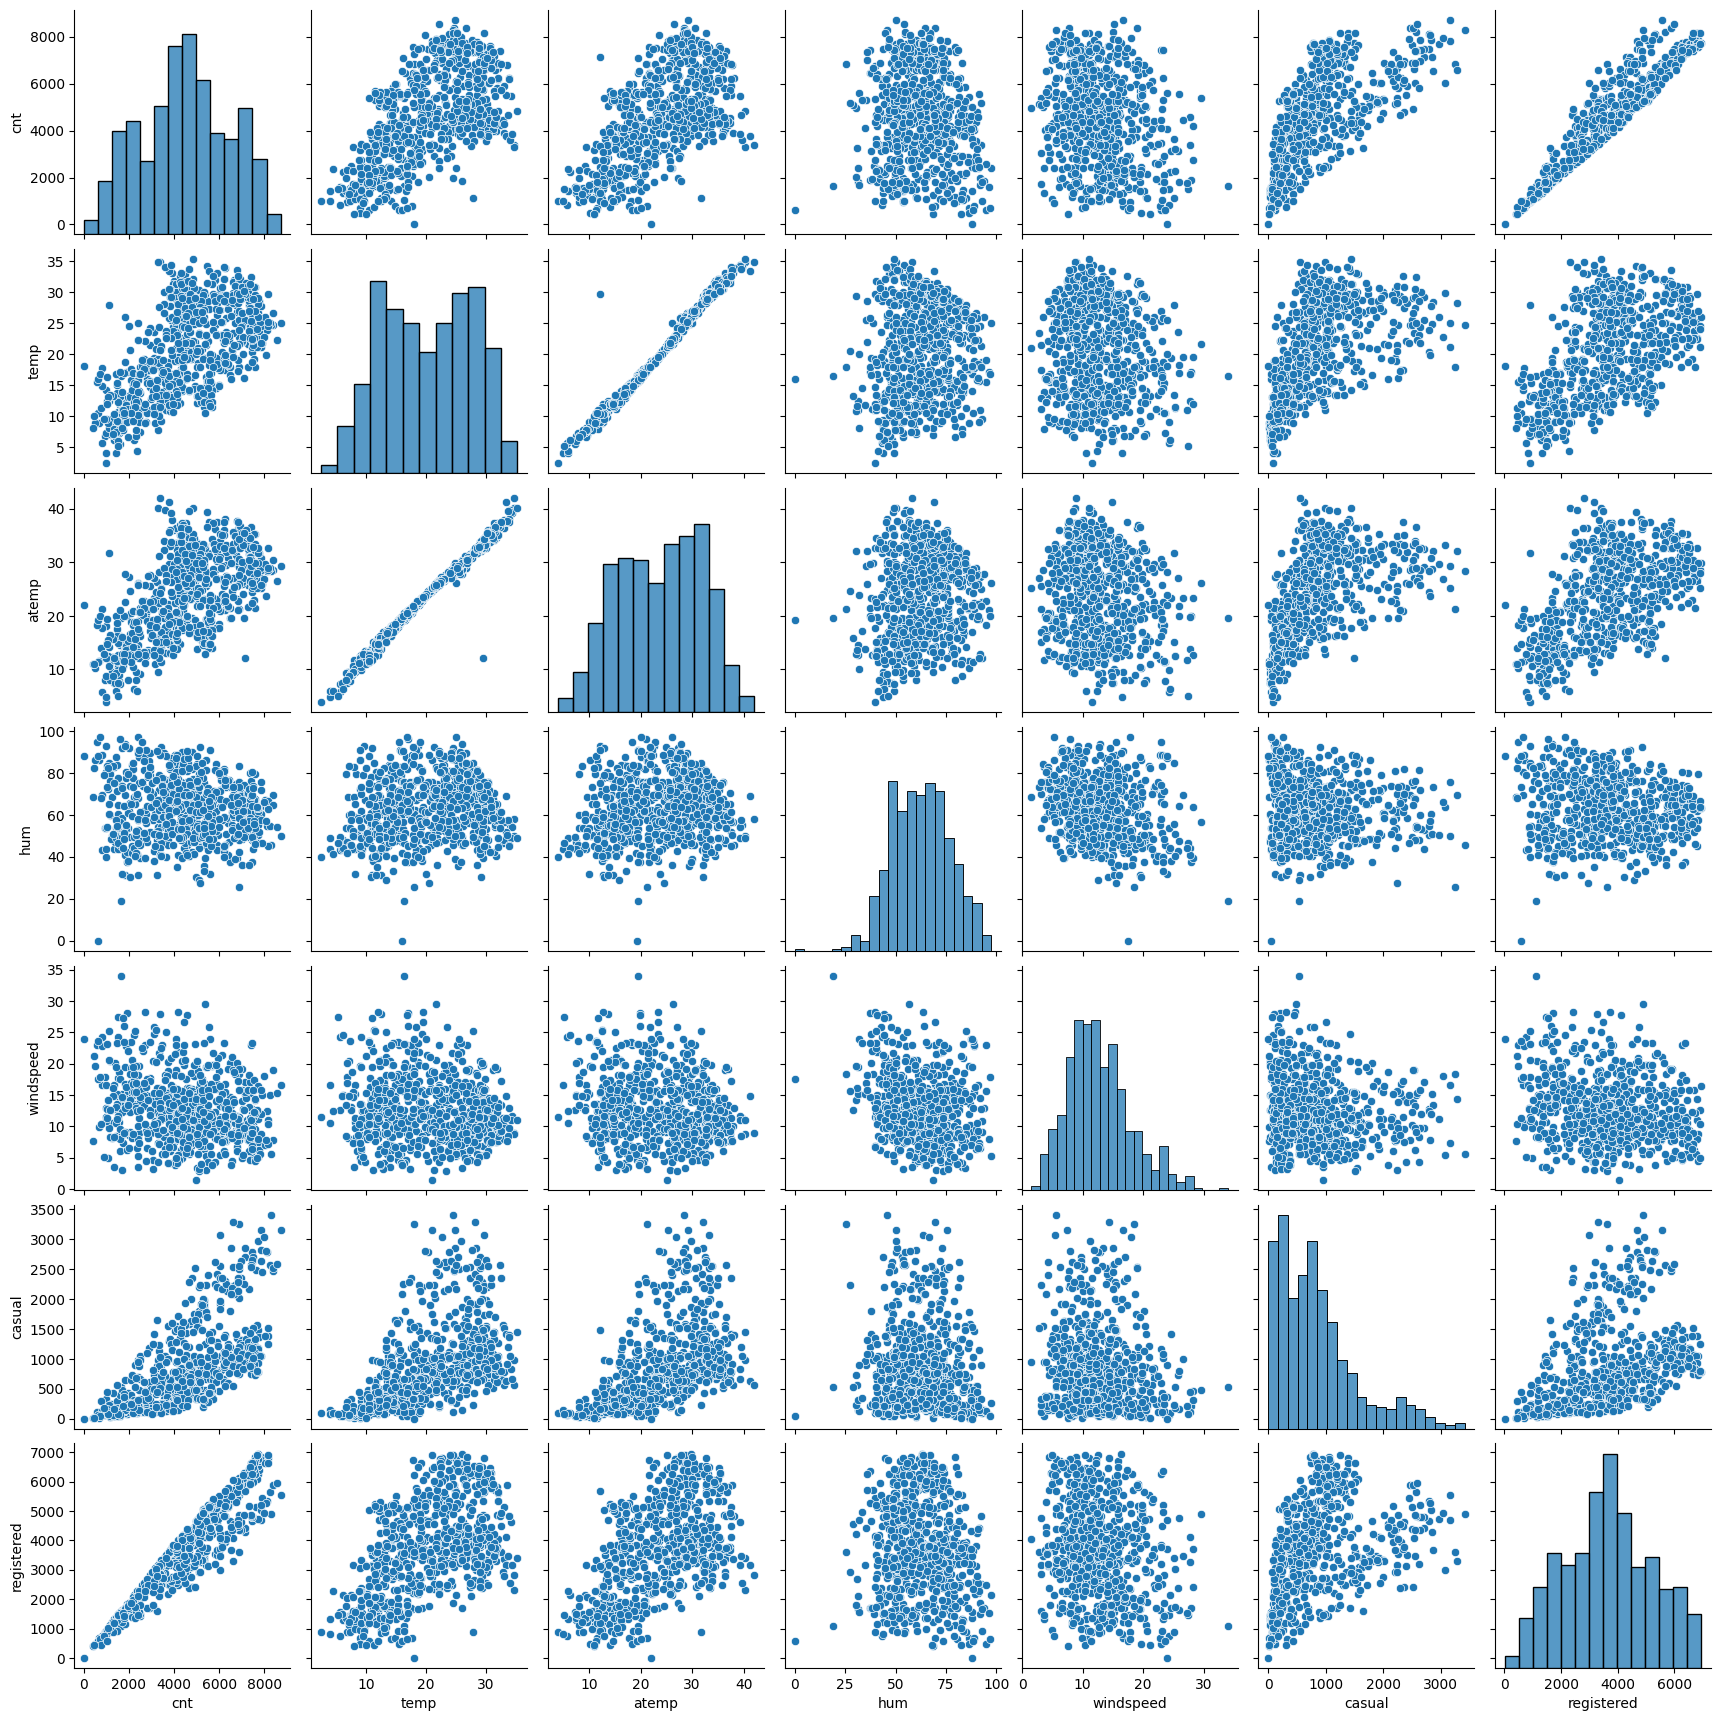

In [7]:
# Here we plot only the numberical variables
sns.pairplot(data, vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'])
plt.show()

In the graphs, the correlation between the following can be clearly seen
1.   temp and cnt
2.   humi and windspeed
3.   registered and cnt
4.   temp and atemp\
Will explore these correlations later



In [8]:
#Mapping categorical variables with their subcategories to visualize

data['season'] = data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter' })
data['mnth'] = data['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
data['weathersit'] = data['weathersit'].map({1: 'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Snow + Fog'})
data['weekday'] = data['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

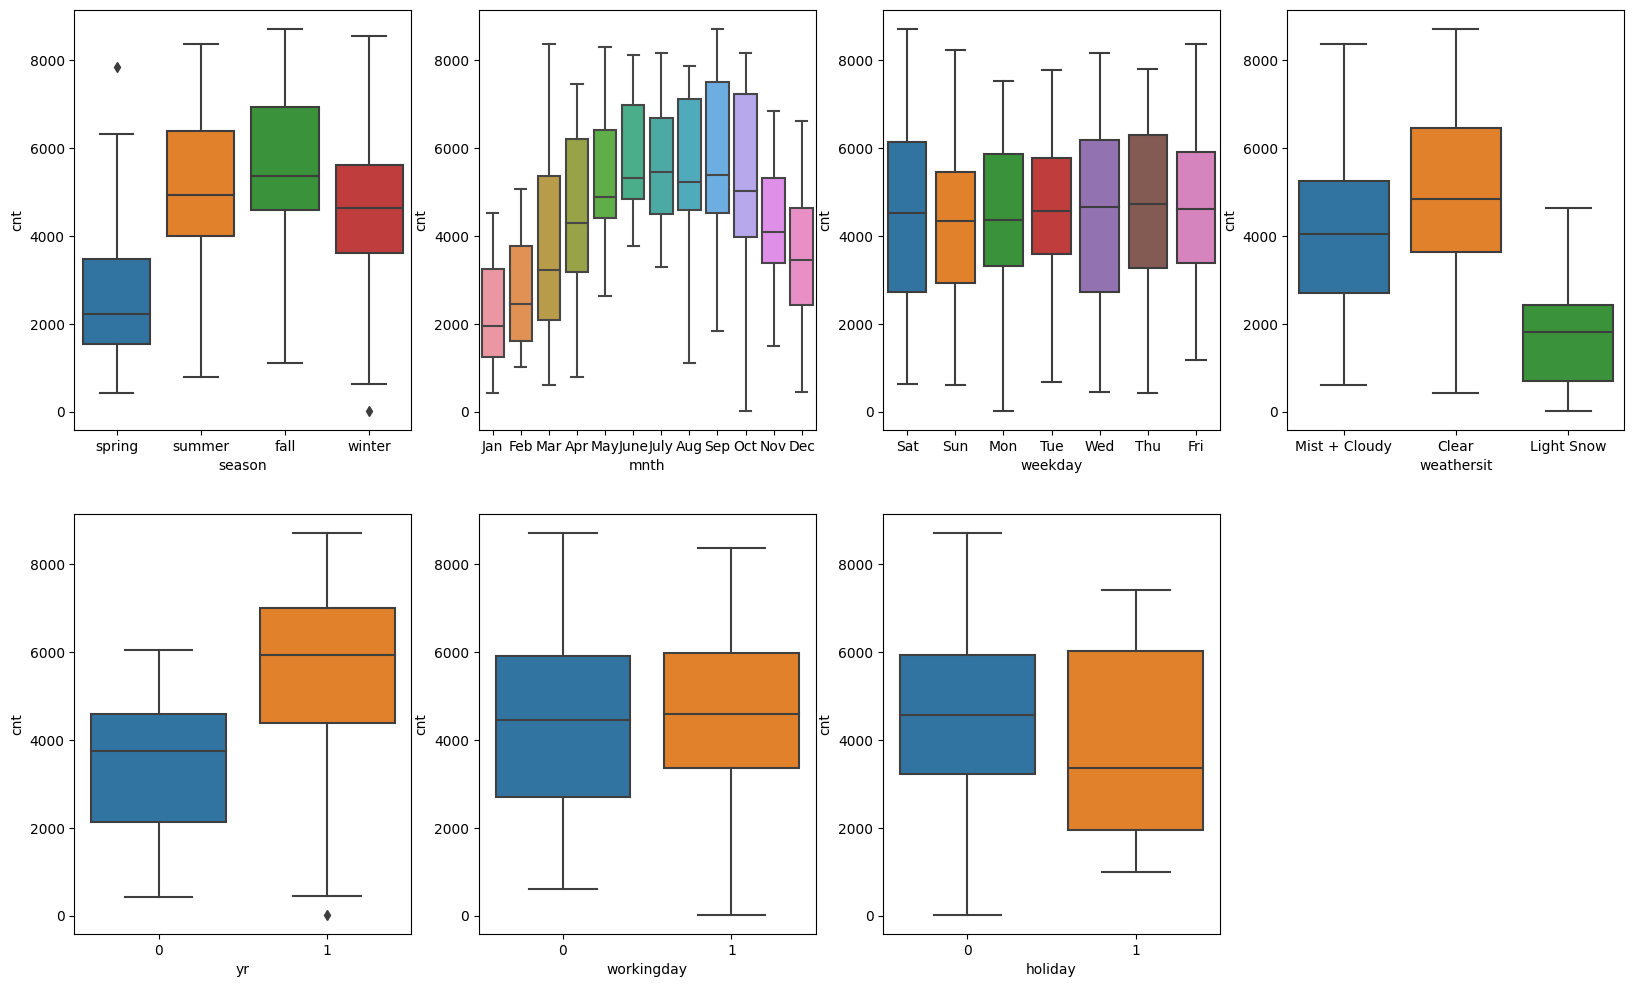

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=data)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=data)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=data)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=data)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=data)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=data)
plt.show()

From the above, the following conclusions can be drawn

1.   Bikes are rented the most in fall season
2.   Bikes are rented the most in the month of September
3.   Bikes are rented the most on Saturday
4.   Bikes are rented the most on days with clear weather
5.   Bikes are rented the most in 2019



# **Data Cleaning**

**Filtering Data**

In [10]:
data.nunique(axis=0)

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

Removing Data with all unique values

In [11]:
# From the above, we get that instant (i.e. record index) and dteday are all unique
# Hence removing them
data.drop(columns = data.columns[data.nunique() == len(data)], inplace = True)

In [12]:
data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
data.shape

(730, 14)

Dropping irrelevant data

In [14]:
data = data.drop(['atemp', 'casual', 'registered'], axis=1)

In [15]:
data.shape

(730, 11)

**Missing Value**

In [16]:
100*data.isnull().mean()

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

Here, we have no missing values

In [17]:
data['weathersit'].value_counts()

Clear            463
Mist + Cloudy    246
Light Snow        21
Name: weathersit, dtype: int64

From the above, we can see that the weathersit only has 3 possible values, i.e 1: clear, 2: mist and 3: light snow. There is no data point having value 4. Hence, if the weathersit value is not mist and not light snow then, it will directly be assumed as clear in the dummy variables

In [18]:
data['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

**Creating dummy variables for the categorical variables generated above**

In [19]:
for column in ['weathersit', 'season', 'mnth', 'weekday']:
  dummy_var_data = pd.get_dummies(data[column], drop_first = True)
  # Add the results to the original dataframe
  data = pd.concat([data, dummy_var_data], axis = 1)

  # Drop actual columns as we have created the dummies for it
  data.drop([column], axis = 1, inplace = True)

data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light Snow,Mist + Cloudy,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# **Split the data into train and test sets**

In [20]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

# **Scaling the data**



As we can see that temp, atemp, hum, windspeed, casual, registered and cnt columns have relatively higher values than the other columns, hence performing scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
# Apply scaler() to all the columns
columns = ['temp', 'hum', 'windspeed', 'cnt']
df_train[columns] = scaler.fit_transform(df_train[columns])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light Snow,Mist + Cloudy,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,1,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
df_train.shape

(510, 29)

In [24]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light Snow,Mist + Cloudy,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.029412,0.343137,0.243137,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.169124,0.475223,0.429398,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


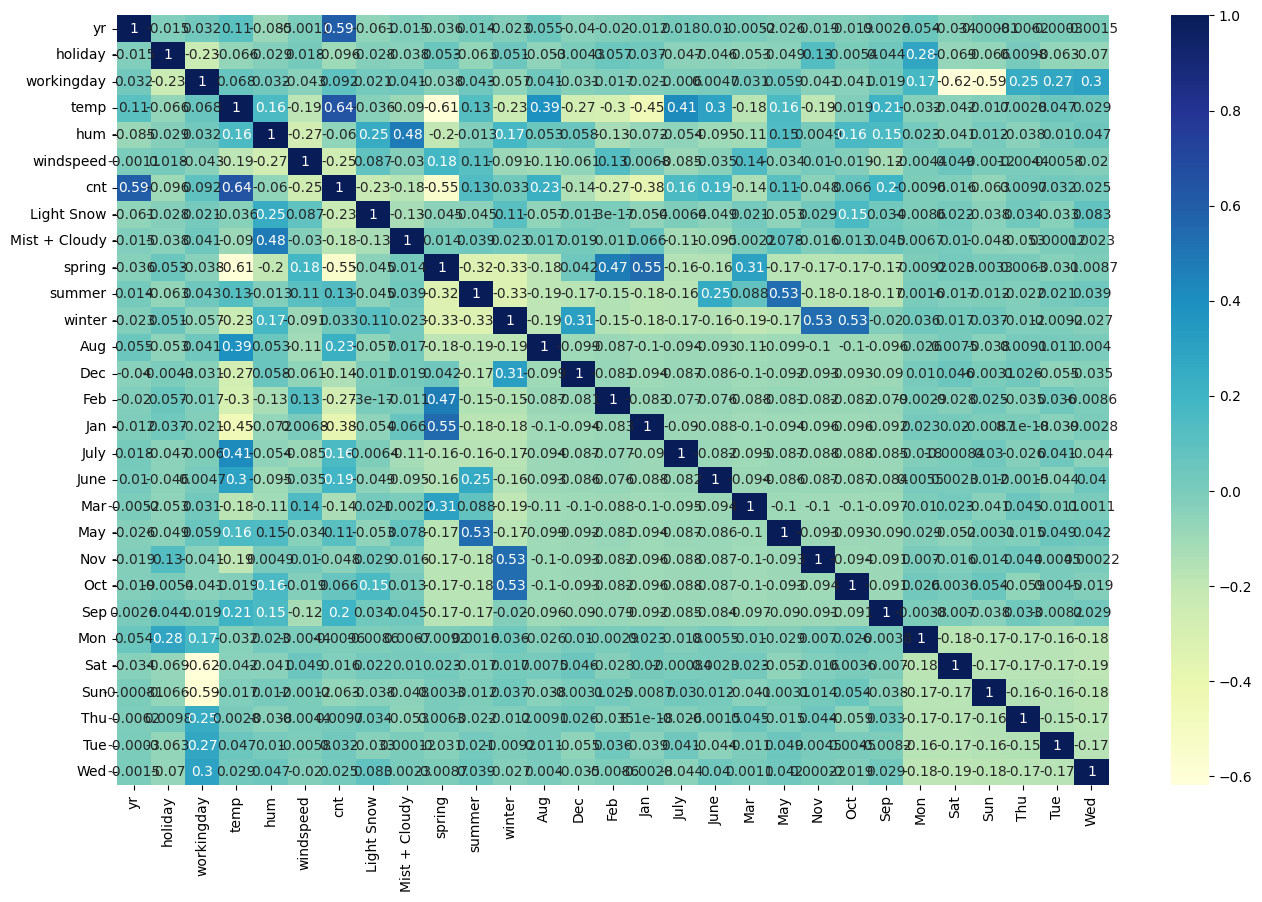

In [25]:
# Finding correlations
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above heatmap, the temp field seems to have highest correlation with cnt field. Will start building the model with this field


# **Building the Model**

Dividing into X and Y sets for the model building

In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

**Manual Approach - StatsModels**

In [27]:
# Adding a constant variable
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train['temp'])

In [28]:
#Fit the model and get the details
lm = sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           5.80e-61
Time:                        16:36:37   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

Need more improved version of the model

In [29]:
X_train_sm = sm.add_constant(X_train[['temp', 'yr']])
#Fit the model and get the details
lm = sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          9.25e-130
Time:                        16:36:37   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

Rebuild the model with all variables

In [30]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train[X_train.columns])

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          8.74e-182
Time:                        16:36:37   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2451      0.035      6.955

For the above model, the variable 'Mar' seem insignificant. Hence, dropping

In [31]:
X_train_new = X_train.drop(["Mar"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          8.33e-183
Time:                        16:36:38   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2456      0.033      7.447

For the above model, the variable 'June' seem insignificant. Hence, dropping

In [32]:
X_train_new = X_train_new.drop(["June"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          7.84e-184
Time:                        16:36:38   Log-Likelihood:                 527.94
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2452      0.033      7.471

**Automated Approach - RFE**

In [33]:
len(data.columns)

29

In [34]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to half of the columns
lm = LinearRegression()
lm.fit(X_train, y_train)

num_features_to_select = len(X_train.columns)//2
rfe = RFE(lm, n_features_to_select = num_features_to_select)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 13),
 ('May', False, 7),
 ('Nov', False, 4),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 15),
 ('Tue', False, 10),
 ('Wed', False, 14)]

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Light Snow',
       'Mist + Cloudy', 'spring', 'winter', 'July', 'Sep', 'Sat', 'Sun'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['summer', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov',
       'Oct', 'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

Statsmodel build to get details for the above model

In [38]:
X_train_rfe = X_train[col]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          3.81e-190
Time:                        16:36:38   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2418      0.025      9.590

Define function to calculate VIF

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X_train_rfe):
  X_train_rfe = X_train_rfe.drop(['const'], axis = 1)
  vif = pd.DataFrame()
  X = X_train_rfe
  vif['Features'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)

In [40]:
calculate_vif(X_train_rfe)

         Features    VIF
2      workingday  40.71
12            Sat   9.93
13            Sun   9.64
3            temp   2.99
8          spring   2.55
1         holiday   2.54
4             hum   1.89
9          winter   1.78
7   Mist + Cloudy   1.57
10           July   1.30
6      Light Snow   1.25
5       windspeed   1.17
11            Sep   1.11
0              yr   1.03


In [41]:
# Drop workingday due to high VIF
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

#Rebuild the model
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          3.81e-190
Time:                        16:36:38   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3364      0.031     10.879

In [42]:
calculate_vif(X_train_rfe)

         Features    VIF
3             hum  22.65
2            temp  15.30
4       windspeed   4.06
7          spring   2.55
6   Mist + Cloudy   2.25
8          winter   2.10
0              yr   2.06
9            July   1.40
11            Sat   1.23
12            Sun   1.23
5      Light Snow   1.21
10            Sep   1.20
1         holiday   1.06


In [43]:
# Drop hum due to high VIF
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

#Rebuild the model
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          4.38e-188
Time:                        16:36:38   Log-Likelihood:                 503.75
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     497   BIC:                            -926.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2575      0.024     10.857

In [44]:
calculate_vif(X_train_rfe)

         Features   VIF
2            temp  4.73
3       windspeed  4.04
0              yr  2.06
6          spring  1.68
5   Mist + Cloudy  1.52
7          winter  1.43
8            July  1.35
10            Sat  1.23
11            Sun  1.21
9             Sep  1.20
4      Light Snow  1.08
1         holiday  1.06


In [45]:
# Drop Sat due to high p and low VIF
X_train_rfe = X_train_rfe.drop(['Sat'], axis=1)

#Rebuild the model
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.8
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          4.60e-189
Time:                        16:36:38   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     498   BIC:                            -931.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2597      0.024     10.993

In [46]:
calculate_vif(X_train_rfe)

         Features   VIF
2            temp  4.67
3       windspeed  4.01
0              yr  2.06
6          spring  1.66
5   Mist + Cloudy  1.52
7          winter  1.41
8            July  1.35
9             Sep  1.20
10            Sun  1.18
4      Light Snow  1.08
1         holiday  1.05


In [47]:
X_train_rfe.describe()

,const,yr,holiday,temp,windspeed,Light Snow,Mist + Cloudy,spring,winter,July,Sep,Sun
count,510.0,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000
mean,1.0,0.507843,0.025490,0.537262,0.320768,0.029412,0.343137,0.243137,0.24902,0.076471,0.080392,0.143137
std,0.0,0.500429,0.157763,0.225844,0.169797,0.169124,0.475223,0.429398,0.43287,0.266010,0.272166,0.350557
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.339853,0.199179,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.0,1.000000,0.000000,0.540519,0.296763,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.0,1.000000,0.000000,0.735215,0.414447,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


**We can select the above model as the final model**

# **Residual Analysis**

In [48]:
y_train_price = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

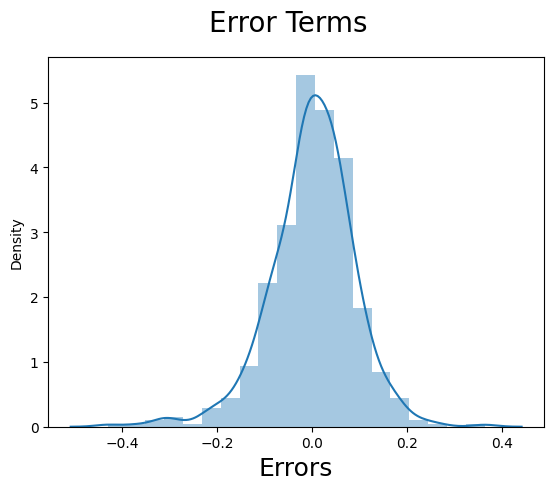

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms are normally distributed

#**Predicting on test set**

In [50]:
columns = ['temp', 'hum', 'windspeed', 'cnt']
df_test[columns] = scaler.transform(df_test[columns])

In [51]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light Snow,Mist + Cloudy,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.027397,0.319635,0.255708,...,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.163612,0.467403,0.437258,...,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
y_test = df_test.pop('cnt')
X_test = df_test

In [53]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [54]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

# Adding a constant variable
X_test_rfe = sm.add_constant(X_test_rfe)

# Making predictions
y_pred = lm.predict(X_test_rfe)

# **Model Evaluation**

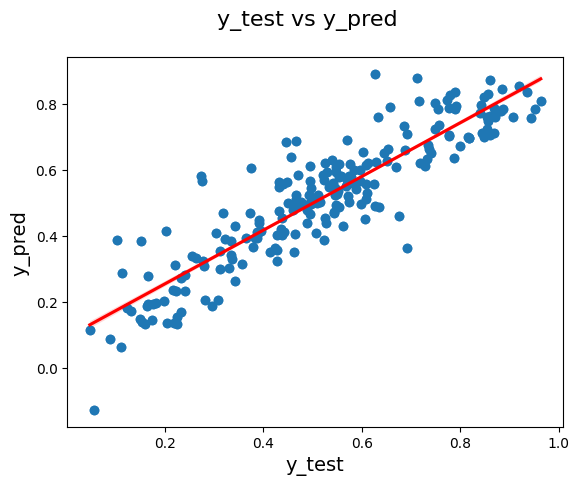

In [55]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_pred', fontsize = 14)
plt.show()

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.809677795028276